# SVL 00 - Python Primer

In [1]:
import numpy as np

## Task 1

Implement a function that creates a dictionary with the following words as keys and each word's length as the key's value:

In [9]:
words = "Implement a function that creates a dictionary with the following words as keys and each word's length as the key's value"

In [10]:
adic = {
    "name": "Johannes",
    "age": 27,
}

def func(words):
    D = {}
    
    for w in words.split():
        #print(w, len(w))
        D[w] = len(w)
    
    return D

func(words)

{'Implement': 9,
 'a': 1,
 'function': 8,
 'that': 4,
 'creates': 7,
 'dictionary': 10,
 'with': 4,
 'the': 3,
 'following': 9,
 'words': 5,
 'as': 2,
 'keys': 4,
 'and': 3,
 'each': 4,
 "word's": 6,
 'length': 6,
 "key's": 5,
 'value': 5}

# Task 2

Implement a function that computes the Precision and Recall from the following confusion matrix:

In [11]:
C = np.array([[97, 29], # TP, FP
              [3, 71]]) # FN, TN
# Assume: 
# rows = predicted classes (row0=positive,row1=negative), 
# cols = true classes (col0=positive, col1=negative)

In [12]:
def precision_recall(conf_mat):
    prec = 0.
    reca = 0.
    
    prec = C[0][0]/(C[0][0] + C[0][1])
    reca = C[0][0]/(C[0][0] + C[1][0])
    
    print(conf_mat[0,:], conf_mat[:,1])
    
    prec = conf_mat[0,0] / conf_mat[0,:].sum()
    reca = conf_mat[0,0] / conf_mat[:,0].sum()
    
    return prec, reca

precision_recall(C)

[97 29] [29 71]


(0.7698412698412699, 0.97)

# Task 3

Implement the inner product for two matrices $$C^{(k, n)} = A^{(k, m)} * B^{(m, n)}$$ without using numpy:

In [13]:
A = [
     [3, 4, 1], 
     [7, -1, 2]
    ]
B = [
     [-1, 2],
     [7, -2], 
     [0, 3]
    ]
print([row[1] for row in B])
print(len(A), "x", len(B[0]), "/", len(B), len(A[0]))
#A00*B00 + A01*B10 + A02*B20 + A10*B01 + A11*B11 + A12*B21
print(list(zip(A,B)))
print(list(row[0] for row in B)[0])

[2, -2, 3]
2 x 2 / 3 3
[([3, 4, 1], [-1, 2]), ([7, -1, 2], [7, -2])]
-1


In [14]:
def matmul(A, B):
        
    C = np.zeros((2,2))
    i = 0
    j = 0
    temp = 0
    k = 0
    
    while i < len(A):
        while j < len(B[0]):
            while k < 3:
                temp += A[i][k] * list(row[j] for row in B)[k]
                k += 1
                    
            C[i][j] = temp
            temp = 0
            j += 1
            k = 0
        i += 1
        j = 0
    return C

matmul(A, B)

array([[ 25.,   1.],
       [-14.,  22.]])

# Task 4

Implement the skeleton of a class 'MyEstimator'. The purpose of the class is to wrap the functionality of an arbitrary supervised learning algorithm. It needs to provide the following interface:
- The constructor must accept a variable number of key-value arguments
- The class must provide a 'fit' method, that accepts a numpy ndarray type named 'X' and another numpy ndarray type named 'y'. The method must return the object it was called on.
- The class must provide a 'predict' method, that accepts a numpy ndarray type named 'X'.

In [15]:
class MyEstimator:
    # 1
    def __init__(self, keyValuePair):
        if not (type(keyValuePair) == np.ndarray or type(keyValuePair) == dict or type(keyValuePair) == list):
            raise ValueError
        self.keyValuePair = keyValuePair
    # 2
    def fit(self, x, y):
        if not (type(x) == np.ndarray and type(y) == np.ndarray or type(x) == list and type(y) == list):
            raise ValueError
        return self
    # 3
    def predict(self, x):
        if not type(x) == np.ndarray:
            raise ValueError
        self.x = x
    
est = MyEstimator({"x" : 1, "y" : 5})
est.fit([5], [5])
est.predict(np.array([5]))

# Task 5: LMS algorithm

In [2]:
import matplotlib.pyplot as plt

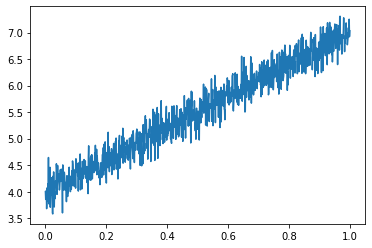

In [58]:
# Dataset
N = 1000
x = np.linspace(0, 1, N)
y = 4 + 3 * x + np.random.normal(0, 0.2, N)
D = [(x[i], y[i]) for i in range(N)]
plt.plot(x, y)

w0:  0.1320045896147536 w1:  -0.13893058427363178
error:  0.031636796532847455    lms:  0.04338819738234049     run:  1000


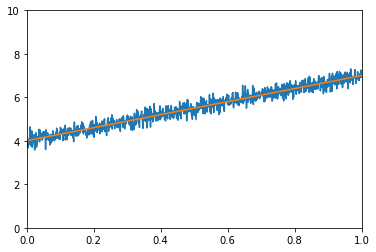

error:  0.031636796532847455    lms:  0.04338819738234049     run:  2000


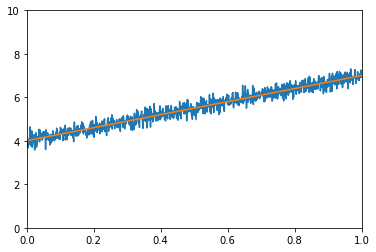

error:  0.031636796532847455    lms:  0.04338819738234049     run:  3000


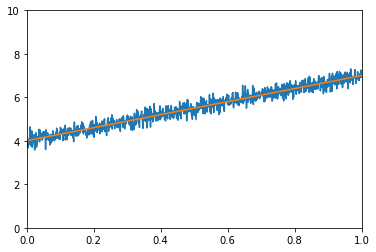

error:  0.031636796532847455    lms:  0.04338819738234049     run:  4000


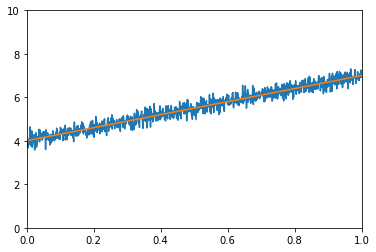

KeyboardInterrupt: 

In [59]:
def lms(dataset, eta, mu): # input data, 
                                               # LMS error threshhold goal, 
                                               # size of adjustments to w0/w1, 
                                               # if slowRate = 1 potentially infinite loop
    w0, w1 = np.random.normal(0, 0.1, 2)
    print("w0: ", w0, "w1: ", w1)
    
    # TODO: algorithm 
    error = 0
    lmsError = eta*N + 1
    runCounter = 0
    while lmsError > eta:
        error = 0
        lmsError = 0
        for num, point in enumerate(D):
            error = D[num][1] - (w0 + w1 * x[num])
            #print([w0, w1], mu, error, [1., x[num]])
            w0 += 2*mu*error
            w1 += 2*mu*error*x[num]
            
        for num, point in enumerate(D):
            lmsError += ((w0 + w1 * x[num]) - D[num][1])**2
        lmsError /= N   
            
        #print("w0: ", w0, "w1: ", w1)
        runCounter += 1
        
        if runCounter%1000 == 0:
            print("error: ", error, "   lms: ", lmsError, "    run: ", runCounter)
            plt.plot(x, y)
            plt.plot(x, w0 + w1 * x)
            plt.axis([0,1,0,10])
            plt.show()
    print("end")
    print("error: ", error, "   lms: ", lmsError, "    run: ", runCounter)
    plt.plot(x, y)
    plt.plot(x, w0 + w1 * x)
    plt.axis([0,1,0,10])
    plt.show()
    return w0, w1

w0, w1 = lms(D, 0.001, 0.001)   

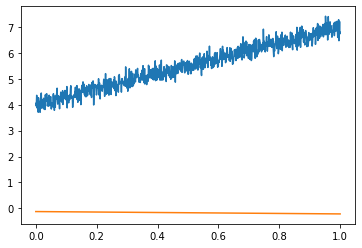

In [23]:
plt.plot(x, y)
plt.plot(x, w0 + x * w1)